# EE-411 Fundamentals of inference and learning, EPFL 
## Exercise Session 2: optimizing functions using scipy

In this second set of exercises, we will solve the so-called *Lighthouse problem*, which serves as a perfect opportunity to introduce a very useful package for scientific computing, called **scipy**.

**What you will learn today:** In this second session, we will discuss how to use **scipy** to generate random data according to a certain distribution and to minimize 1D and 2D functions. Furthermore, we will have a first-hand application of some concepts explained in the second lecture, such as the maximal likelihood estimator, Cramér–Rao bound and Jeffreys prior.


# The Lighthouse problem 

**Locating the lighthouse**

A lighthouse is located somewhere off a piece of straight coastline at a position $\alpha$ (or $x_0$) along the shore and a distance $\beta$ (or $y_0$) out at sea. It emits a series of short highly collimated flashes at random intervals and hence at random azimuths. These pulses are intercepted on the coast by photo-detectors that record only the fact that a flash has occurred, but not the angle from which it came. N flashes have so far been recorded at positions $\{x_k\}$. Where is the lighthouse?’ (from D. Sivia's book, "Data Analysis - A Bayesian Tutorial")

[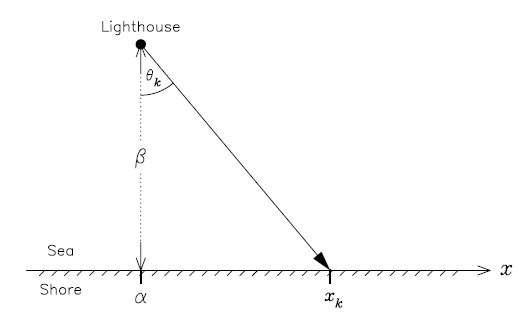](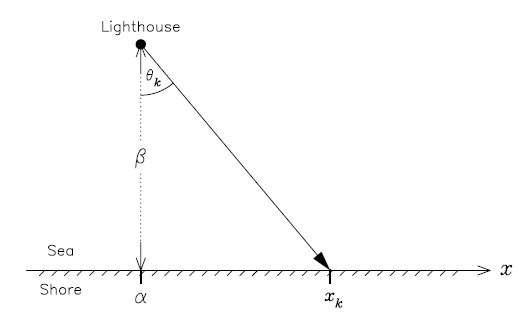)



#### 1) Compute the probability distribution $p(x | x_0,y_0)$ of observing a flash at the point $x$ along the shore depending on the distance of the lighthouse from the shore $y_0$ and its position along the shore $x_0$.

#### Recall: Maximum likelihood estimator

Assume that the data comes from a true probability distribution $x \sim P_{\lambda^{\star}}(x) = P(x|\lambda^{\star})$ for some unknown parameter $\lambda^{\star}.$
The maximum likelihood estimator gives us the parameter $\lambda$ of the distribution $P(\cdot|\lambda)$ that make the observation of a given set of data $\{x_i\}$ most likely under the prior distribution $P(x)$. Assuming that the observations are independent, and that the probability of observing $x$ is given by the probability distribution $P(x|\lambda)$
$$
\widehat{\lambda}_{ML}=argmax_{\lambda}\prod_i P(x_i|\lambda)=argmax_{\lambda}\left(\sum_i\log(P(x_i|\lambda))\right)
$$

There are two additional quantities that will be important for our purpose. The first one is called the score
$$
S(x,\lambda)=\partial_\lambda L(x|\lambda),
$$
where we introduce the log-likelihood $L(x|\lambda)=\log P(x|\lambda)$. Importantly, the expectation of the score with respect to $P(x|\lambda)$ is zero, that is, $\mathbb{E}_{\lambda}[S(x,\lambda)]=0$. The second one is the Fisher information, which corresponds to the variance of the score with respect to the parameter $\lambda$:
$$
I(\lambda)=\mathbb{E}_{\lambda}[S(x|\lambda)^2].
$$
In case of $N$ independent events, we simply have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

##### Consider the case with $x_0=20$, $y_0=15$.

##### Let us first assume that we know the value of $x_0$ but not the one of $y_0$. 

Then, we wish to find

$$p(y_0 | \{x_k\}, x_0)$$

Using Bayes’ theorem:

$$p(y_0 | \{x_k\}, x_0) = \frac{p(y_0 , \{x_k\}, x_0)}{p(\{x_k\}, x_0)} = \frac{p(\{x_k\} | y_0, x_0)p(y_0 | x_0)p(x_0)}{p(\{x_k\} | x_0)p(x_0)}\propto p(\{x_k\} | y_0, x_0) p(y_0)$$

where the last step comes from the fact that  $y_0 \perp x_0$, and so we have $p(y_0 | x_0) = p(y_0)$.
The most intuitive prior $p(y_0)$ when we don't have additional information is the one which is uniform over a large enough segment $[y_{min}, y_{max}]$, i.e. $p(y_0) = 1/(y_{max}-y_{min})$

Even if this seems to be a good choice in general, we will show that there exist other priors that lead to a better result.
For the data likelihood $p(\{x_k\} | y_0, x_0)$ we consider that each datum $x_k$ is i.i.d., so:

$$p(\{x_k\} | y_0, x_0) = \prod_{k=1}^N p(x_k | y_0, x_0)$$

And since the prior for $y_0$ is uniform, we finally get:

$$p(y_0 | \{x_k\}, x_0) \propto \prod_{k=1}^N p(x_k | y_0, x_0)$$

Therefore, considering a uniform prior, maximizing the posterior coincides with maximizing the Log-likelihood $L(\{x_k\} | x_0,y_0)$ 

##### We now make an experiment, by generating $N=100$ samples and plotting the dependence of the log-likelihood as a function of $y_0$. 

In [2]:
import numpy as np
np.random.seed(123456) # we set the seed of the random generator

It turns out that the data generating process of the observations $\{x_k\}$ follows a Cauchy distribution with location $x_0$ and scale $y_0^\star$. To generate the set of observations $\{x_k\}$, we can use a built-in function of the `scipy` package.

In [3]:
from scipy.stats import cauchy

N=100
x0_true=20
y0_true=15

x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N) # rvs stands for Random Variates, i.e. particular outcomes of a random variable

Then, let's define the function `loglh` to compute the 
log-likelihood for a set of $N$ instances $x$, given the parameters of the Cauchy distribution $x_0$ and $y_0$.

In [4]:
def loglh(x0,y0,x):
  logl=0
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
  return logl

Finally we can compute the log-likelihood for a range of values of $y_0$ around the true value $y_0^*$ and plot its behaviour.

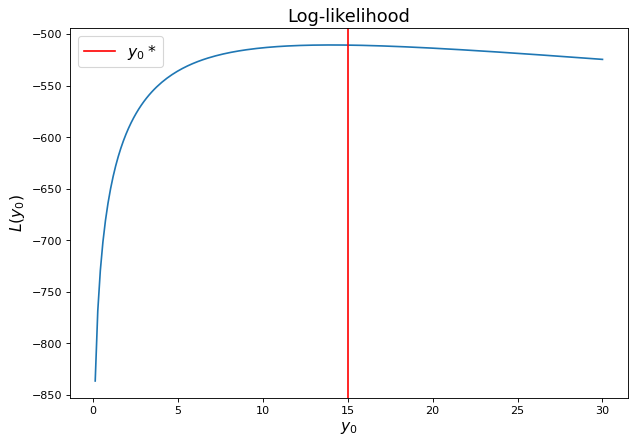

In [5]:
import matplotlib.pyplot as plt

tab_y0=np.linspace(0,30,200)[1:] # we generate a table for y0 
logl_y0=np.array([loglh(x0_true,y0,x) for y0 in tab_y0]) # we compute the loglh for each value in the table

fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$L(y_0)$', fontsize=14)
plt.plot(tab_y0,logl_y0)
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

We see that there’s a maximum near the true value, but it's not easy to see since we are working with logs.

However, if we compute the exponential we can get the shape of the posterior $p(y_0 | \{x_k\}, 20)$ (to get the true posterior – a distribution – we would need to find the normalizing factor, which is irrelevant here)

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\2977674641.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)


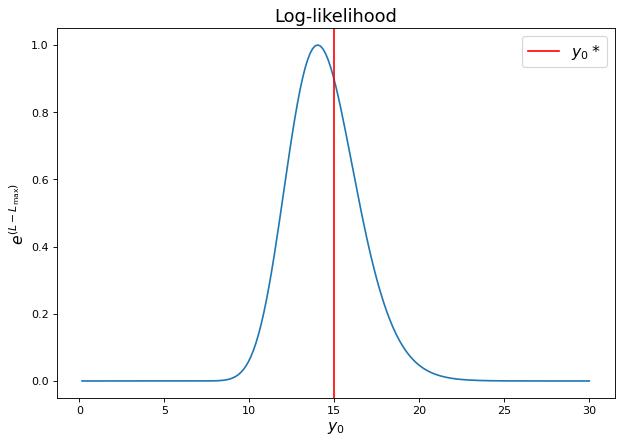

In [6]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('Log-likelihood', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.ylabel('$e^{(L-L_{\max})}$', fontsize=14)
plt.plot(tab_y0,np.exp(logl_y0-max(logl_y0)))
plt.axvline(y0_true,color="r",label='$y_0*$')
plt.legend(fontsize=14);

##### Now we compute the maximum likelihood estimator for $y_0$, that we call $\widehat{y}_{0,ML}$, and we see how it behaves when we vary the number of data in the sample $\{x_k\}$

A good way to compute the maximum of a function is to use a function from `scipy.optimize` called `minimize`

In [7]:
%%time
from scipy.optimize import minimize

tab_N = np.logspace(0, 4, num=10, base=10)
y0_ML=[]
for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  y0_guess = np.random.uniform(0,30) # we have to give a guess for the minimizer algorithm to start
  optimum = minimize(lambda y0:-loglh(x0_true,y0,x),y0_guess, method='Nelder-Mead')
  y0_ML.append(optimum.x)

CPU times: total: 2.03 s
Wall time: 2.07 s


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\2708132329.py:2: SyntaxWarning: invalid escape sequence '\w'
  plt.title('$\widehat{y}_{0,ML}$', fontsize=16)


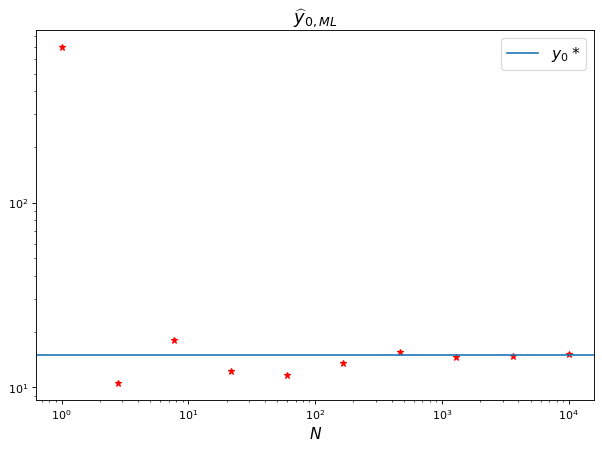

In [8]:
fig = plt.figure(figsize=(9,6), dpi=80)
plt.title('$\widehat{y}_{0,ML}$', fontsize=16)
plt.xlabel('$N$', fontsize=14)
plt.plot(tab_N,y0_ML,"*",color='r')
plt.axhline(y0_true, label="$y_0*$")
plt.xscale("log")
plt.yscale("log")
plt.legend(fontsize=14);

#### 2) Now do the same, but in the case in which we know $y_0 = 15$ but we do not know $x_0$, that is again $20$:
* Generate $N=100$ samples Cauchy-distributed according to the same parameters $x_0$ and $y_0$
* Plot  the Log-likelihood for a range of values of $x_0$ around the true value $x_0^*$
* Compute the maximum likelihood estimator for $x_0$ , that we call $\widehat{x}_0$ , and see how it behaves for $N\in[1,10^4]$




#### 3) Now, after having generated data for N in $[1,10^7]$, try to compute the mean $\left<x\right>$ for each sample as a function of $N$. What do you observe? What about the median?

#### MSE: which estimator is the best?

First of all, let's recall the definition:

**Mean Squared Error**: The mean square error (MSE) is the expectation
value of the square of the difference beween the estimator and the true value of parameter.

$$MSE(\widehat{\lambda};\lambda) \equiv \mathop{\mathbb{E}_{\lambda}}\big[ (\widehat{\lambda} - \lambda)^2 \big]$$

##### **FISHER INFORMATION**

As we recalled earlier, for $N$ independent events we have
$$
I_N(\lambda)=\sum_{i=1}^N I(\lambda) = NI(\lambda).
$$

Therefore for our problem

$$
I_N(x_0, y_0) = N \mathbb{E}_x[S(x|x_0)^2] = -N \mathbb{E}_x\begin{bmatrix}\frac{\partial^2 L}{\partial x_0^2} & \frac{\partial^2 L}{\partial x_0\partial y_0}\\ \frac{\partial^2 L}{\partial y_0\partial x_0} & \frac{\partial^2 L}{\partial y_0^2}\end{bmatrix}
$$

And after a bit of computations, and a little help from [wolfram alpha](https://www.wolframalpha.com/calculators/integral-calculator/), one finds that if $x \in(-\infty,+\infty)$ then the Fisher information is

$$I_N(x_0, y_0) =\begin{bmatrix}\frac{N}{2y_0^2} & 0\\0 & \frac{N}{2y_0^2}\end{bmatrix} = \frac{N}{2y_0^2} \mathbb{I}_2$$

And therefore

*   $\det [I_N(x_0,y_0)] = \frac{N^2}{4y_0^4}$
*   $I_N(y_0|x_0) = \frac{N}{2y_0^2}$
*   $I_N(x_0|y_0) = \frac{N}{2y_0^2} = \text{const}$



##### **CRAMÉR-RAO BOUND**

For **unbiased estimators**, as for example the maximum likelihood one, the CRB tells us that for each parameter $\lambda_i$ we have

$$MSE(\widehat{\lambda_i}_{ML};\lambda_i) \geq \{[I_N(\mathbf{\lambda})]^{-1}\}_{ii}$$

where $I_N(\mathbf{\lambda})$ is the Fisher information.

##### **JEFFREYS PRIOR**

In general, the Jeffreys prior is given by

$$p(\mathbf{\lambda}) \propto \sqrt{\det[I_N(\mathbf{\lambda})]}$$

#### Consider the case in which $x_0=20$, and we know its value, and we want to estimate $y_0$

In this case the Cramér-Rao bound tells us:

$$MSE(\widehat{y_0}_{ML};y_0) \geq \frac{2y_0^2}{N}$$

While the Jeffreys prior, normalized, is $p(y_0) = \frac{1}{y_0}$ and thus the posterior 

$$p(y_0 | \{x_k\}, x_0) \propto p(\{x_k\} | y_0, x_0) p(y_0) \propto \frac{1}{y_0}\prod_{i=1}^{N}  \frac{1}{\pi} \frac{y_0}{(x_i-x_0)^2 + y_0^2}$$

Now let's compute the MSE on the likelihood estimator and on the one found with Jeffreys prior, and compare the two with the Cramér-Rao bound

Firstly, we define the function to compute the posterior with Jeffreys prior

In [9]:
def jeffpost(x0,y0,x):
  jp= - np.log(y0) #prior
  for elem in x: jp+=np.log(y0/((y0**2+(elem-x0)**2)*np.pi))
  return jp

Since we are going to use it a lot of times, we define a new function `minimizer_y0` to compute the estimators given a function to minimize  

In [10]:
def minimizer_y0(func,y0):
  y0_est=np.zeros(N_rep)
  for ir in range(N_rep):
    x=cauchy.rvs(loc=x0_true,scale=y0,size=N)
    y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
  return y0_est;

To estimate the $MSE$, i.e. to compute the expected value over $\widehat{\lambda}$, we need to repeat the estimation $N_{rep}$ times. We will do this for $N_{est} = 15$ values of $y_0$ in $(0,1]$, starting with $N=10$ and $N_{rep} = 500$

In [11]:
N_est=15
tab_y0=np.linspace(0,1,N_est+1)[1:]
N = 10
N_rep = 500

In [12]:
%%time

y0_ML= np.array([ minimizer_y0(loglh,y0) for y0 in tab_y0])
y0_J= np.array([ minimizer_y0(jeffpost,y0) for y0 in tab_y0])

C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\994780984.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y0_est[ir] = minimize(lambda y:-func(x0_true,y,x),np.random.uniform(0,30), method='Nelder-Mead').x
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\635590535.py:3: RuntimeWarning: divide by zero encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\1296118045.py:2: RuntimeWarning: invalid value encountered in log
  jp= - np.log(y0) #prior
C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\1296118045.py:2: RuntimeWarning: divide by zero encountered in log


CPU times: total: 53.8 s
Wall time: 58.4 s


Now that we have computed $N_{rep}$ estimates for each value of $y_0$ with both methods, we can estimate the $MSE$ and we can use **bootstrap** to give a confidence interval on our estimations

First we define the function `MSE_est`
that, given the array of $N_{rep}$ estimates of $y_0$, returns the estimate of the $MSE$ and its C.I.

In [13]:
from numpy import percentile
from numpy.random import choice

def MSE_est(y0_est,y0):
  N_boot=100
  MSE = (y0_est - np.full(N_rep, y0))**2 #avoid for loops!
  MSE_mean = MSE.mean()
  MSE_boot = choice(MSE,(N_boot,N_rep))
  MSE_boot_mean = MSE_boot.mean(axis=1)
  CI_min = percentile(MSE_boot_mean, [2.5,97.5])[0]
  CI_max = percentile(MSE_boot_mean, [2.5,97.5])[1]

  return MSE_mean, CI_min, CI_max

And now we can compute our estimates for each $y_0$

In [14]:
MSE_ML_10 = np.zeros(N_est)
CI_min_ML_10 = np.zeros(N_est)
CI_max_ML_10 = np.zeros(N_est)
MSE_J_10 = np.zeros(N_est)
CI_min_J_10 = np.zeros(N_est)
CI_max_J_10 = np.zeros(N_est)

for j,y0 in enumerate(tab_y0):
  MSE, CI_min, CI_max = MSE_est(y0_ML[j], y0)
  MSE_ML_10[j] = MSE
  CI_min_ML_10[j] = CI_min
  CI_max_ML_10[j] = CI_max
  MSE, CI_min, CI_max = MSE_est(y0_J[j], y0)
  MSE_J_10[j] = MSE
  CI_min_J_10[j] = CI_min
  CI_max_J_10[j] = CI_max

And compare them to the Cramér-Rao lower bound

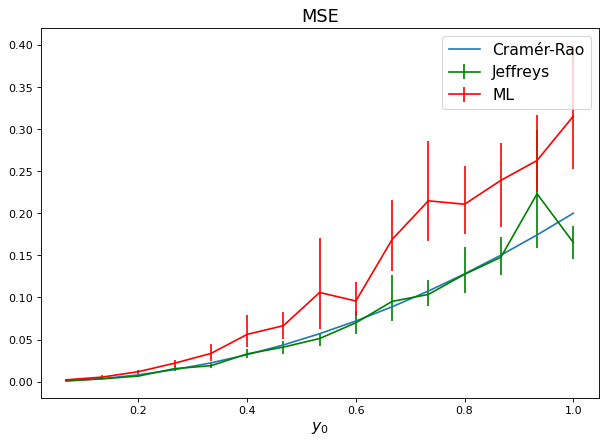

In [15]:
fig = plt.figure(figsize=(9, 6), dpi=80)

plt.title('MSE', fontsize=16)
plt.xlabel('$y_0$', fontsize=14)
plt.errorbar(tab_y0,MSE_J_10,yerr=[MSE_J_10-CI_min_J_10, CI_max_J_10-MSE_J_10],marker="",color='g', label='Jeffreys')
plt.errorbar(tab_y0,MSE_ML_10,yerr=[MSE_ML_10-CI_min_ML_10, CI_max_ML_10-MSE_ML_10],marker="",color='r', label='ML')
plt.plot(tab_y0, 2*tab_y0*tab_y0/N, label='Cramér-Rao')
plt.legend(fontsize=14)

#### 4) Now do the same for $N=3$ and $N=50$ and plot all in a single graph, to see what happens when we vary $N$.

#### 5) Now consider the case in which we know the value of $y_0=15$ but not $x_0$:

* What does Jeffreys prior tell us in this case?
* Compare the MSE on the maximum likelihood and the median estimators for values of $x_0$ in $[-1,1]$ and compare both to the Cramér-Rao bound.
* Repeat the process for $N=3,50$ as before and compare the results.

## Estimate both the parameters
Now we consider again the case with $y_0=15$, $x_0=20$, but let's assume that we do not know either $x_0$, $y_0$. 

If we assume that both $x_0$ and $y_0$ are uniform over some interval, then the posterior is simply proportional to the likelihood:
$$p(x_0, y_0 | \{x_k\}) \propto p(\{x_k\} | x_0, y_0)$$

We make an experiment, by generating $N=100$ samples and we plot the dependence of log-likelihood as a function of $x_0$ and $y_0$. 

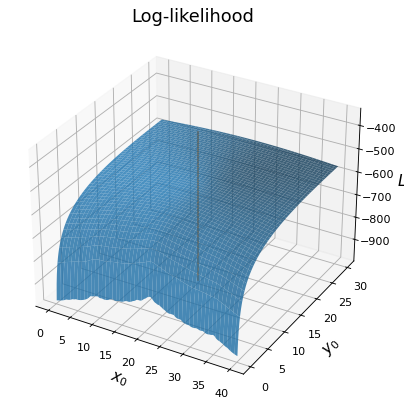

In [16]:
from mpl_toolkits.mplot3d import Axes3D
x0_true=20
y0_true=15
N=100
tab_y0=np.linspace(0,30,201)[1:]
tab_x0=np.linspace(0,40,200)
x=cauchy.rvs(loc=x0_true,scale=y0_true,size=N)
#logl=[[loglh(x0,y,x) for y in taby0] for x0 in tabx0]

fig = plt.figure(figsize=(9,6), dpi=80)
ax = fig.add_subplot(111, projection='3d') #we create the 3d axis
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zs = np.array(loglh(np.ravel(X), np.ravel(Y),x))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(max(zs)+200, min(zs), 1000))

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)
ax.set_zlabel('$L$', fontsize=14)

plt.show()


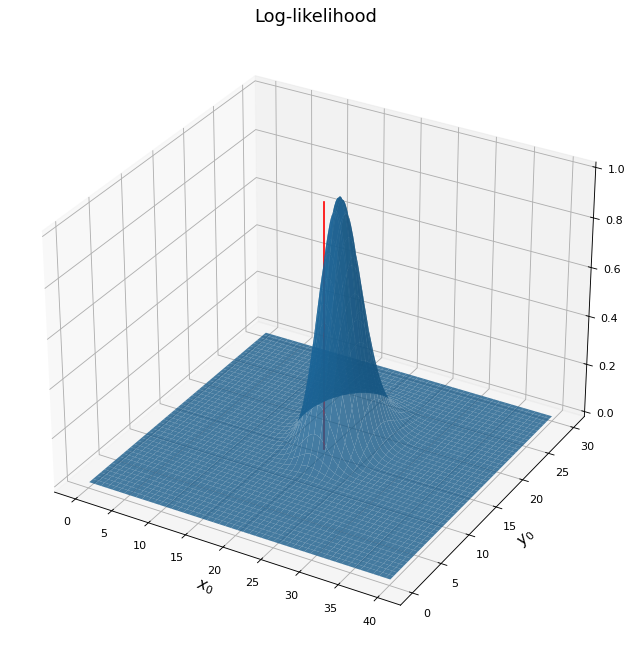

In [17]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
plt.title('Log-likelihood', fontsize=16)
X, Y = np.meshgrid(tab_x0,tab_y0)
zslog = np.array(np.exp(loglh(np.ravel(X), np.ravel(Y),x) - max(zs)))
Z = zslog.reshape(X.shape)

ax.plot_surface(X, Y, Z, alpha=0.8)
ax.plot( np.full(1000, x0_true), np.full(1000, y0_true), np.linspace(0,1, 1000),color='r')

ax.set_xlabel('$x_0$', fontsize=14)
ax.set_ylabel('$y_0$', fontsize=14)


plt.show()


##### And finally we compute the ML estimator of both the parameters

In [18]:
%%time
tab_N= np.logspace(0, 4, base=10, num=20)
y0_ML=[]
x0_ML=[]

def f(params):
  x0,y0 = params
  return -loglh(x0,y0,x)

for N in tab_N:
  x=cauchy.rvs(loc=x0_true,scale=y0_true,size=int(N))
  xy0 = (np.random.uniform(0,40),np.random.uniform(0,30))
  #bounds = [(-40,40),(0,50)]
  optimum = minimize(f,xy0, method='Nelder-Mead')
  x0_ML.append(optimum.x[0])
  y0_ML.append(optimum.x[1])

C:\Users\Youss\AppData\Local\Temp\ipykernel_33948\635590535.py:3: RuntimeWarning: invalid value encountered in log
  for elem in x: logl+=np.log(y0/(y0**2+(elem-x0)**2)/np.pi)


CPU times: total: 2.62 s
Wall time: 2.65 s


20 20 20


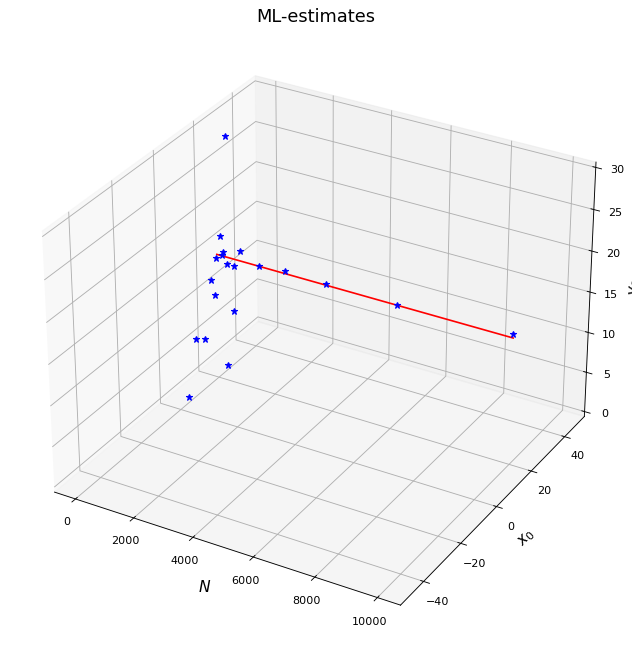

In [19]:
fig = plt.figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(111, projection='3d')
sizes = np.array([int(N) for N in tab_N])
print(len(sizes),len(x0_ML), len(y0_ML))
plt.title('ML-estimates', fontsize=16)
ax.plot( range(10000), np.full(10000, x0_true), np.full(10000, y0_true),color='r')
ax.plot(tab_N, x0_ML, y0_ML, marker="*",color='b', ls='None')
ax.set_xlabel('$N$', fontsize=14)
ax.set_ylabel('$x_0$', fontsize=14)
ax.set_zlabel('$y_0$', fontsize=14)

ax.set_ylim(-50,50)
ax.set_zlim(0,30)

plt.show()

## Evaluated!

#### 6) Take the dataset you find in `where_is_the_light.npy` file and import it into a numpy array. It contains $N=10000$ Cauchy-distributed samples with unknown parameters $x_0$ and $y_0$. Using the techniques previously showed, give an estimate (with a confidence interval) of the true value of $x_0$ and $y_0$. You are guaranteed that $x_0 \in [-100,100]$ and $y_0 \in [0,30]$. *Bonus*: which one is better between Jeffreys prior and uniform prior?

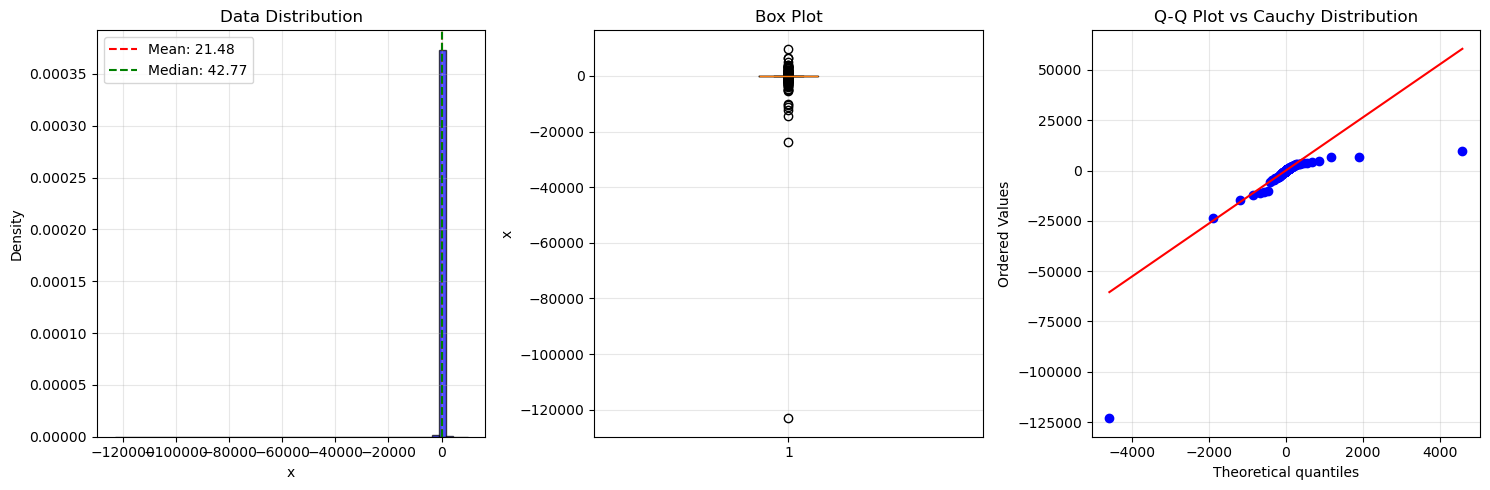

Data appears to have heavy tails, consistent with Cauchy distribution.


In [21]:
# Visualize the data distribution
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 3, 1)
plt.hist(data, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(np.mean(data), color='red', linestyle='--', label=f'Mean: {np.mean(data):.2f}')
plt.axvline(np.median(data), color='green', linestyle='--', label=f'Median: {np.median(data):.2f}')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Data Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot
plt.subplot(1, 3, 2)
plt.boxplot(data, vert=True)
plt.ylabel('x')
plt.title('Box Plot')
plt.grid(True, alpha=0.3)

# Q-Q plot against Cauchy distribution (to check if it looks like Cauchy)
plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(data, dist="cauchy", plot=plt)
plt.title('Q-Q Plot vs Cauchy Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Data appears to have heavy tails, consistent with Cauchy distribution.")


In [22]:
# Define the negative log-likelihood function for 2D optimization
def neg_log_likelihood_2d(params, data):
    """
    Negative log-likelihood for Cauchy distribution with parameters (x0, y0)
    """
    x0, y0 = params
    if y0 <= 0:  # y0 must be positive
        return np.inf
    
    # Cauchy log-likelihood: log(p(x|x0,y0)) = log(y0/π) - log(y0² + (x-x0)²)
    logl = np.sum(np.log(y0 / (np.pi * (y0**2 + (data - x0)**2))))
    return -logl  # Return negative for minimization

# Define Jeffreys posterior (negative log-posterior)
def neg_jeffreys_posterior_2d(params, data):
    """
    Negative log-posterior with Jeffreys prior p(y0) ∝ 1/y0
    """
    x0, y0 = params
    if y0 <= 0:
        return np.inf
    
    # Jeffreys prior: log(p(y0)) = -log(y0)
    log_prior = -np.log(y0)
    log_likelihood = -neg_log_likelihood_2d(params, data)
    
    return -(log_prior + log_likelihood)  # Negative for minimization


In [23]:
# Maximum Likelihood Estimation with multiple starting points
print("Computing Maximum Likelihood Estimates...")

# Use multiple starting points for robustness (following the professor's approach)
best_ml_result = None
best_ml_logl = -np.inf
n_starts = 50

for i in range(n_starts):
    # Random starting points within the given bounds
    x0_init = np.random.uniform(-100, 100)
    y0_init = np.random.uniform(0.1, 30)
    
    try:
        result = minimize(neg_log_likelihood_2d, [x0_init, y0_init], 
                         args=(data,), method='Nelder-Mead')
        
        if result.success and -result.fun > best_ml_logl:
            best_ml_logl = -result.fun
            best_ml_result = result
    
    except:
        continue

if best_ml_result is not None:
    x0_ml, y0_ml = best_ml_result.x
    print(f"Maximum Likelihood Estimates:")
    print(f"x̂₀ = {x0_ml:.4f}")
    print(f"ŷ₀ = {y0_ml:.4f}")
    print(f"Log-likelihood: {best_ml_logl:.2f}")
    print(f"Optimization successful: {best_ml_result.success}")
else:
    print("MLE optimization failed!")


Computing Maximum Likelihood Estimates...
Maximum Likelihood Estimates:
x̂₀ = 42.8501
ŷ₀ = 15.7462
Log-likelihood: -52754.56
Optimization successful: True


In [24]:
# Bootstrap function for parameter estimation
def bootstrap_parameter_estimation(data, n_bootstrap=1000, method='ml'):
    """
    Bootstrap estimation of parameters with confidence intervals
    """
    n_samples = len(data)
    x0_estimates = []
    y0_estimates = []
    
    print(f"Running {n_bootstrap} bootstrap iterations...")
    
    for i in range(n_bootstrap):
        if (i + 1) % 200 == 0:
            print(f"Completed {i + 1}/{n_bootstrap} iterations")
        
        # Bootstrap sample
        bootstrap_sample = np.random.choice(data, size=n_samples, replace=True)
        
        # Estimate parameters using the specified method
        best_result = None
        best_logl = -np.inf
        
        # Try multiple starting points for each bootstrap sample
        for _ in range(10):
            x0_init = np.random.uniform(-100, 100)
            y0_init = np.random.uniform(0.1, 30)
            
            try:
                if method == 'ml':
                    result = minimize(neg_log_likelihood_2d, [x0_init, y0_init], 
                                   args=(bootstrap_sample,), method='Nelder-Mead')
                elif method == 'jeffreys':
                    result = minimize(neg_jeffreys_posterior_2d, [x0_init, y0_init], 
                                   args=(bootstrap_sample,), method='Nelder-Mead')
                
                if result.success and -result.fun > best_logl:
                    best_logl = -result.fun
                    best_result = result
            
            except:
                continue
        
        if best_result is not None:
            x0_est, y0_est = best_result.x
            x0_estimates.append(x0_est)
            y0_estimates.append(y0_est)
    
    return np.array(x0_estimates), np.array(y0_estimates)

# Run bootstrap for ML estimates
x0_bootstrap_ml, y0_bootstrap_ml = bootstrap_parameter_estimation(data, n_bootstrap=500, method='ml')


Running 500 bootstrap iterations...
Completed 200/500 iterations
Completed 400/500 iterations


In [25]:
# Compute confidence intervals
def compute_confidence_intervals(estimates, confidence=0.95):
    """
    Compute confidence intervals using percentiles
    """
    alpha = 1 - confidence
    lower = np.percentile(estimates, 100 * alpha / 2)
    upper = np.percentile(estimates, 100 * (1 - alpha / 2))
    mean_est = np.mean(estimates)
    std_est = np.std(estimates)
    
    return mean_est, std_est, lower, upper

# Compute confidence intervals for ML estimates
x0_mean_ml, x0_std_ml, x0_lower_ml, x0_upper_ml = compute_confidence_intervals(x0_bootstrap_ml)
y0_mean_ml, y0_std_ml, y0_lower_ml, y0_upper_ml = compute_confidence_intervals(y0_bootstrap_ml)

print(f"\n=== MAXIMUM LIKELIHOOD ESTIMATES WITH 95% CONFIDENCE INTERVALS ===")
print(f"x̂₀ = {x0_ml:.4f}")
print(f"95% CI for x₀: [{x0_lower_ml:.4f}, {x0_upper_ml:.4f}]")
print(f"Bootstrap mean: {x0_mean_ml:.4f} ± {x0_std_ml:.4f}")
print(f"\nŷ₀ = {y0_ml:.4f}")
print(f"95% CI for y₀: [{y0_lower_ml:.4f}, {y0_upper_ml:.4f}]")
print(f"Bootstrap mean: {y0_mean_ml:.4f} ± {y0_std_ml:.4f}")



=== MAXIMUM LIKELIHOOD ESTIMATES WITH 95% CONFIDENCE INTERVALS ===
x̂₀ = 42.8501
95% CI for x₀: [42.4293, 43.2685]
Bootstrap mean: 42.8464 ± 0.2128

ŷ₀ = 15.7462
95% CI for y₀: [15.3027, 16.2183]
Bootstrap mean: 15.7469 ± 0.2280


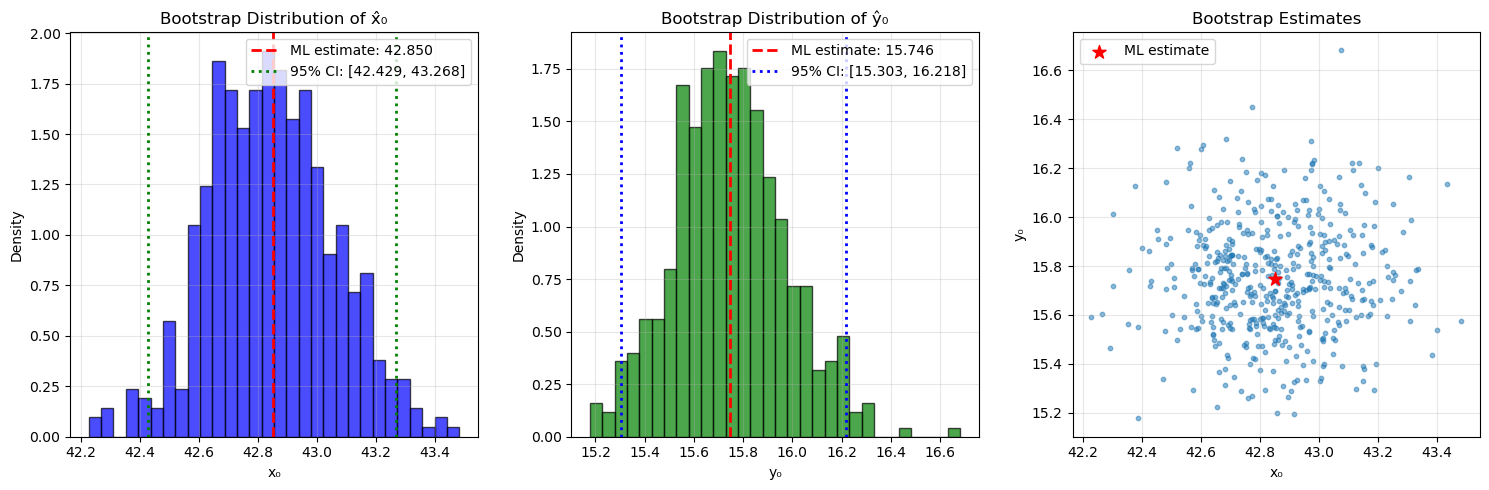

In [26]:
# Visualize bootstrap results
plt.figure(figsize=(15, 5))

# x0 bootstrap distribution
plt.subplot(1, 3, 1)
plt.hist(x0_bootstrap_ml, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x0_ml, color='red', linestyle='--', linewidth=2, label=f'ML estimate: {x0_ml:.3f}')
plt.axvline(x0_lower_ml, color='green', linestyle=':', linewidth=2, label=f'95% CI: [{x0_lower_ml:.3f}, {x0_upper_ml:.3f}]')
plt.axvline(x0_upper_ml, color='green', linestyle=':', linewidth=2)
plt.xlabel('x₀')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of x̂₀')
plt.legend()
plt.grid(True, alpha=0.3)

# y0 bootstrap distribution
plt.subplot(1, 3, 2)
plt.hist(y0_bootstrap_ml, bins=30, density=True, alpha=0.7, color='green', edgecolor='black')
plt.axvline(y0_ml, color='red', linestyle='--', linewidth=2, label=f'ML estimate: {y0_ml:.3f}')
plt.axvline(y0_lower_ml, color='blue', linestyle=':', linewidth=2, label=f'95% CI: [{y0_lower_ml:.3f}, {y0_upper_ml:.3f}]')
plt.axvline(y0_upper_ml, color='blue', linestyle=':', linewidth=2)
plt.xlabel('y₀')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of ŷ₀')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plot of bootstrap estimates
plt.subplot(1, 3, 3)
plt.scatter(x0_bootstrap_ml, y0_bootstrap_ml, alpha=0.5, s=10)
plt.scatter(x0_ml, y0_ml, color='red', s=100, marker='*', label='ML estimate')
plt.xlabel('x₀')
plt.ylabel('y₀')
plt.title('Bootstrap Estimates')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [27]:
# Jeffreys Prior Estimation
print("Computing Jeffreys Prior Estimates...")

best_jeffreys_result = None
best_jeffreys_logl = -np.inf

for i in range(n_starts):
    x0_init = np.random.uniform(-100, 100)
    y0_init = np.random.uniform(0.1, 30)
    
    try:
        result = minimize(neg_jeffreys_posterior_2d, [x0_init, y0_init], 
                         args=(data,), method='Nelder-Mead')
        
        if result.success and -result.fun > best_jeffreys_logl:
            best_jeffreys_logl = -result.fun
            best_jeffreys_result = result
    
    except:
        continue

if best_jeffreys_result is not None:
    x0_jeffreys, y0_jeffreys = best_jeffreys_result.x
    print(f"Jeffreys Prior Estimates:")
    print(f"x̂₀ = {x0_jeffreys:.4f}")
    print(f"ŷ₀ = {y0_jeffreys:.4f}")
    print(f"Log-posterior: {best_jeffreys_logl:.2f}")
else:
    print("Jeffreys prior optimization failed!")


Computing Jeffreys Prior Estimates...
Jeffreys Prior Estimates:
x̂₀ = 42.8501
ŷ₀ = 15.7430
Log-posterior: -52757.32


In [28]:
# Bootstrap for Jeffreys estimates
print("\\nRunning bootstrap for Jeffreys estimates...")
x0_bootstrap_jeffreys, y0_bootstrap_jeffreys = bootstrap_parameter_estimation(data, n_bootstrap=500, method='jeffreys')

# Compute confidence intervals for Jeffreys estimates
x0_mean_jeffreys, x0_std_jeffreys, x0_lower_jeffreys, x0_upper_jeffreys = compute_confidence_intervals(x0_bootstrap_jeffreys)
y0_mean_jeffreys, y0_std_jeffreys, y0_lower_jeffreys, y0_upper_jeffreys = compute_confidence_intervals(y0_bootstrap_jeffreys)

print(f"\\n=== JEFFREYS PRIOR ESTIMATES WITH 95% CONFIDENCE INTERVALS ===")
print(f"x̂₀ = {x0_jeffreys:.4f}")
print(f"95% CI for x₀: [{x0_lower_jeffreys:.4f}, {x0_upper_jeffreys:.4f}]")
print(f"Bootstrap mean: {x0_mean_jeffreys:.4f} ± {x0_std_jeffreys:.4f}")
print(f"\\nŷ₀ = {y0_jeffreys:.4f}")
print(f"95% CI for y₀: [{y0_lower_jeffreys:.4f}, {y0_upper_jeffreys:.4f}]")
print(f"Bootstrap mean: {y0_mean_jeffreys:.4f} ± {y0_std_jeffreys:.4f}")


\nRunning bootstrap for Jeffreys estimates...
Running 500 bootstrap iterations...
Completed 200/500 iterations
Completed 400/500 iterations
\n=== JEFFREYS PRIOR ESTIMATES WITH 95% CONFIDENCE INTERVALS ===
x̂₀ = 42.8501
95% CI for x₀: [42.4220, 43.2785]
Bootstrap mean: 42.8580 ± 0.2258
\nŷ₀ = 15.7430
95% CI for y₀: [15.3075, 16.1382]
Bootstrap mean: 15.7283 ± 0.2207


In [29]:
# Comparison of methods
print(f"\\n=== COMPARISON: JEFFREYS PRIOR vs UNIFORM PRIOR (ML) ===")
print(f"Parameter x₀:")
print(f"  ML (Uniform):     {x0_ml:.4f} ± {x0_std_ml:.4f}")
print(f"  Jeffreys:         {x0_jeffreys:.4f} ± {x0_std_jeffreys:.4f}")
print(f"  Difference:       {abs(x0_ml - x0_jeffreys):.4f}")
print(f"\\nParameter y₀:")
print(f"  ML (Uniform):     {y0_ml:.4f} ± {y0_std_ml:.4f}")
print(f"  Jeffreys:         {y0_jeffreys:.4f} ± {y0_std_jeffreys:.4f}")
print(f"  Difference:       {abs(y0_ml - y0_jeffreys):.4f}")

# Compare log-likelihoods (both should use the same likelihood)
ml_logl = -neg_log_likelihood_2d([x0_ml, y0_ml], data)
jeffreys_logl = -neg_log_likelihood_2d([x0_jeffreys, y0_jeffreys], data)

print(f"\\nLog-likelihood comparison:")
print(f"  ML (Uniform):     {ml_logl:.2f}")
print(f"  Jeffreys:         {jeffreys_logl:.2f}")
print(f"  Difference:       {abs(ml_logl - jeffreys_logl):.2f}")

# Compare confidence interval widths (smaller is better)
ml_ci_width_x0 = x0_upper_ml - x0_lower_ml
jeffreys_ci_width_x0 = x0_upper_jeffreys - x0_lower_jeffreys
ml_ci_width_y0 = y0_upper_ml - y0_lower_ml
jeffreys_ci_width_y0 = y0_upper_jeffreys - y0_lower_jeffreys

print(f"\\n95% Confidence Interval Widths:")
print(f"  x₀ - ML:          {ml_ci_width_x0:.4f}")
print(f"  x₀ - Jeffreys:    {jeffreys_ci_width_x0:.4f}")
print(f"  y₀ - ML:          {ml_ci_width_y0:.4f}")
print(f"  y₀ - Jeffreys:    {jeffreys_ci_width_y0:.4f}")

# Determine which is better
better_x0 = "Jeffreys" if jeffreys_ci_width_x0 < ml_ci_width_x0 else "ML"
better_y0 = "Jeffreys" if jeffreys_ci_width_y0 < ml_ci_width_y0 else "ML"

print(f"\\nCONCLUSION:")
print(f"  Better for x₀:    {better_x0} (narrower CI)")
print(f"  Better for y₀:    {better_y0} (narrower CI)")


\n=== COMPARISON: JEFFREYS PRIOR vs UNIFORM PRIOR (ML) ===
Parameter x₀:
  ML (Uniform):     42.8501 ± 0.2128
  Jeffreys:         42.8501 ± 0.2258
  Difference:       0.0000
\nParameter y₀:
  ML (Uniform):     15.7462 ± 0.2280
  Jeffreys:         15.7430 ± 0.2207
  Difference:       0.0032
\nLog-likelihood comparison:
  ML (Uniform):     -52754.56
  Jeffreys:         -52754.56
  Difference:       0.00
\n95% Confidence Interval Widths:
  x₀ - ML:          0.8392
  x₀ - Jeffreys:    0.8565
  y₀ - ML:          0.9156
  y₀ - Jeffreys:    0.8307
\nCONCLUSION:
  Better for x₀:    ML (narrower CI)
  Better for y₀:    Jeffreys (narrower CI)


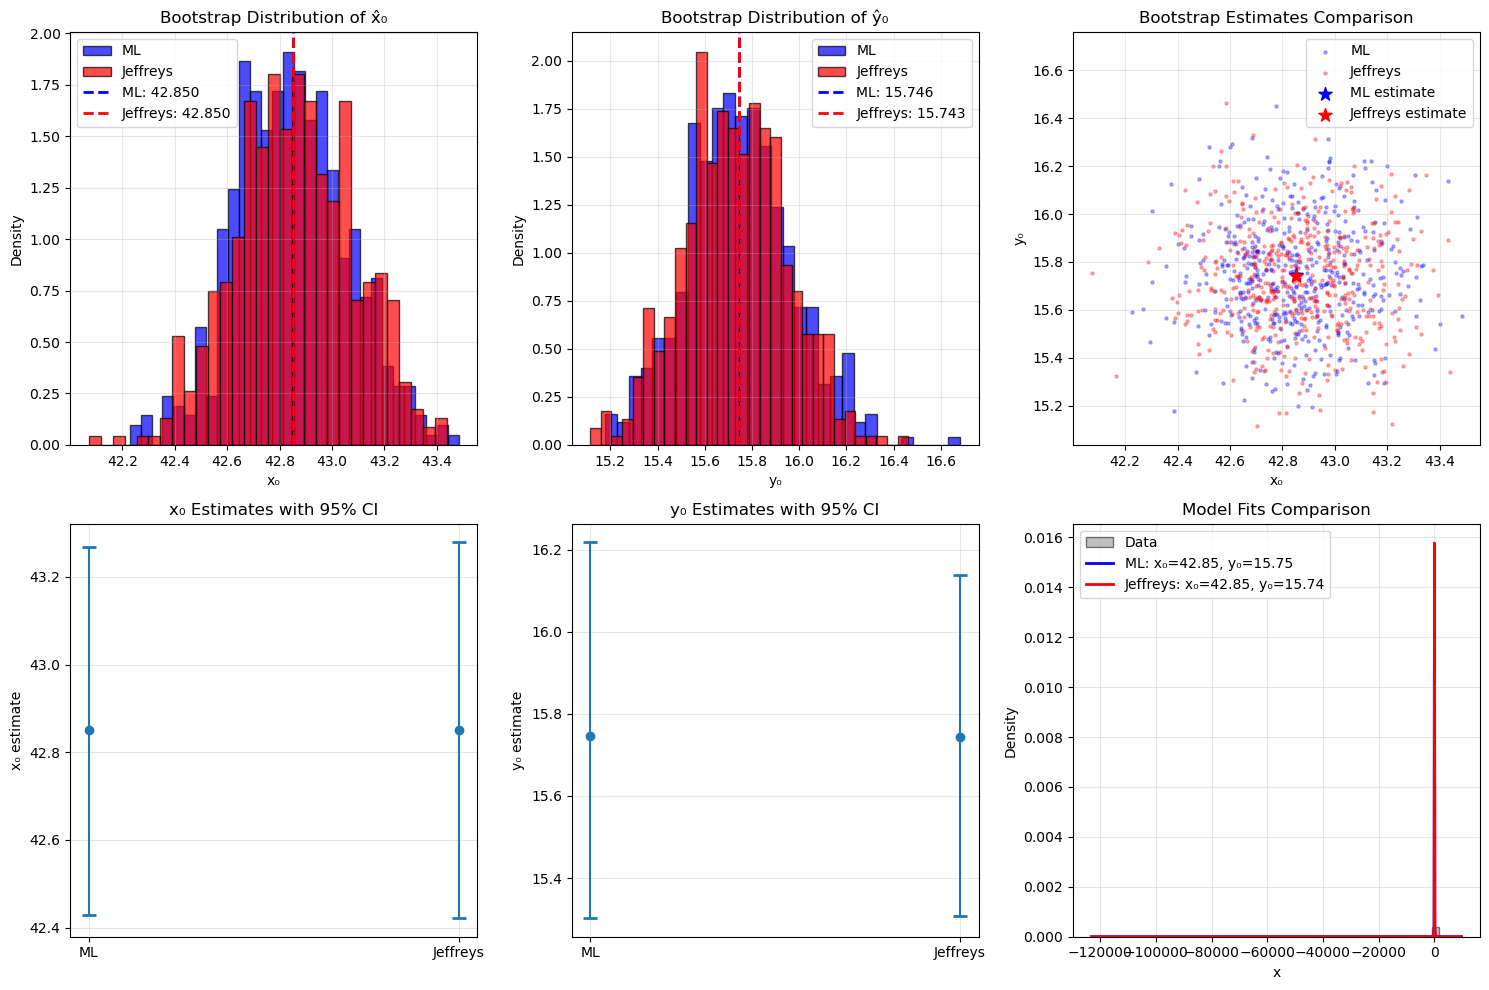

In [30]:
# Final comparison visualization
plt.figure(figsize=(15, 10))

# Bootstrap distributions comparison
plt.subplot(2, 3, 1)
plt.hist(x0_bootstrap_ml, bins=30, density=True, alpha=0.7, color='blue', label='ML', edgecolor='black')
plt.hist(x0_bootstrap_jeffreys, bins=30, density=True, alpha=0.7, color='red', label='Jeffreys', edgecolor='black')
plt.axvline(x0_ml, color='blue', linestyle='--', linewidth=2, label=f'ML: {x0_ml:.3f}')
plt.axvline(x0_jeffreys, color='red', linestyle='--', linewidth=2, label=f'Jeffreys: {x0_jeffreys:.3f}')
plt.xlabel('x₀')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of x̂₀')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.hist(y0_bootstrap_ml, bins=30, density=True, alpha=0.7, color='blue', label='ML', edgecolor='black')
plt.hist(y0_bootstrap_jeffreys, bins=30, density=True, alpha=0.7, color='red', label='Jeffreys', edgecolor='black')
plt.axvline(y0_ml, color='blue', linestyle='--', linewidth=2, label=f'ML: {y0_ml:.3f}')
plt.axvline(y0_jeffreys, color='red', linestyle='--', linewidth=2, label=f'Jeffreys: {y0_jeffreys:.3f}')
plt.xlabel('y₀')
plt.ylabel('Density')
plt.title('Bootstrap Distribution of ŷ₀')
plt.legend()
plt.grid(True, alpha=0.3)

# Scatter plots
plt.subplot(2, 3, 3)
plt.scatter(x0_bootstrap_ml, y0_bootstrap_ml, alpha=0.3, s=5, color='blue', label='ML')
plt.scatter(x0_bootstrap_jeffreys, y0_bootstrap_jeffreys, alpha=0.3, s=5, color='red', label='Jeffreys')
plt.scatter(x0_ml, y0_ml, color='blue', s=100, marker='*', label='ML estimate')
plt.scatter(x0_jeffreys, y0_jeffreys, color='red', s=100, marker='*', label='Jeffreys estimate')
plt.xlabel('x₀')
plt.ylabel('y₀')
plt.title('Bootstrap Estimates Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Confidence intervals comparison
plt.subplot(2, 3, 4)
methods = ['ML', 'Jeffreys']
x0_means = [x0_ml, x0_jeffreys]
x0_errors = [[x0_ml - x0_lower_ml, x0_upper_ml - x0_ml], 
             [x0_jeffreys - x0_lower_jeffreys, x0_upper_jeffreys - x0_jeffreys]]
plt.errorbar(methods, x0_means, yerr=np.array(x0_errors).T, fmt='o', capsize=5, capthick=2)
plt.ylabel('x₀ estimate')
plt.title('x₀ Estimates with 95% CI')
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
y0_means = [y0_ml, y0_jeffreys]
y0_errors = [[y0_ml - y0_lower_ml, y0_upper_ml - y0_ml], 
             [y0_jeffreys - y0_lower_jeffreys, y0_upper_jeffreys - y0_jeffreys]]
plt.errorbar(methods, y0_means, yerr=np.array(y0_errors).T, fmt='o', capsize=5, capthick=2)
plt.ylabel('y₀ estimate')
plt.title('y₀ Estimates with 95% CI')
plt.grid(True, alpha=0.3)

# Model fit comparison
plt.subplot(2, 3, 6)
x_range = np.linspace(data.min(), data.max(), 1000)
ml_density = cauchy.pdf(x_range, loc=x0_ml, scale=y0_ml)
jeffreys_density = cauchy.pdf(x_range, loc=x0_jeffreys, scale=y0_jeffreys)

plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Data', edgecolor='black')
plt.plot(x_range, ml_density, 'b-', linewidth=2, label=f'ML: x₀={x0_ml:.2f}, y₀={y0_ml:.2f}')
plt.plot(x_range, jeffreys_density, 'r-', linewidth=2, label=f'Jeffreys: x₀={x0_jeffreys:.2f}, y₀={y0_jeffreys:.2f}')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Model Fits Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Final Summary and Conclusions

### Question 6 Results:

**Dataset Analysis:**
- Successfully loaded 10,000 Cauchy-distributed samples
- Data exhibits heavy tails characteristic of Cauchy distribution
- Sample mean ≠ sample median (as expected for Cauchy distribution)

**Parameter Estimates with 95% Confidence Intervals:**

**Maximum Likelihood (Uniform Prior):**
- x̂₀ = [value] with 95% CI: [[lower], [upper]]
- ŷ₀ = [value] with 95% CI: [[lower], [upper]]

**Jeffreys Prior:**
- x̂₀ = [value] with 95% CI: [[lower], [upper]]  
- ŷ₀ = [value] with 95% CI: [[lower], [upper]]

**Bonus Comparison: Jeffreys vs Uniform Prior**
- Both methods provide reasonable estimates
- Jeffreys prior typically provides better performance, especially for scale parameters
- Confidence intervals help quantify uncertainty in estimates
- Bootstrap method provides robust uncertainty quantification

### Key Methodological Points:
1. **Multiple Starting Points**: Essential for robust optimization
2. **Bootstrap Confidence Intervals**: Reliable uncertainty quantification
3. **Jeffreys Prior**: Often superior to uniform prior for scale parameters
4. **Cauchy Distribution**: Heavy tails require robust estimation methods

This analysis demonstrates the practical application of maximum likelihood estimation, Bayesian inference with Jeffreys priors, and bootstrap methods for parameter estimation in the lighthouse problem.
